# Segundo Analisís al índice Busátil S&P 500
## ESE-IPN.
## Series de Tiempo.
# Ismael Domínguez Olalde.

In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. Referir a los datos, frecuencia, unidad de medida, fuente, etc.

### **Información General**

La serie de tiempo escogida para este trabajo es el indicador bursátil llamado S&P 500 (Standard & Poor´s 500). Este índice es uno de los índices mas importantes de la economía estadounidense, ya que este representa la capitalización de las 500 empresas más grandes en cotización en la bolsa de valores (NYSE o NASDAQ).

La justificación de la elección de esta variable, esta en la forma que es ponderada, (a través del capital flotante) la cual la hacen de los índices mas representativo de la situación del mercado accionario, principalmente estadounidense. Este indicador existe en otras bolsas fuera de los Estados Unidos, pero este trabajo trabaja con el índice Estadounidense, ya que esta abarca las 500 empresas mas fuertes de este país, que en su mayor parte son las más fuertes del mundo.
Frecuencia.

### **Frecuencia**
La periodicidad con la que se le da mantenimiento al indicador es constante, por las características que debe tener para que este se mantenga como un indicador dentro de la bolsa, es por eso por lo que este varia cada segundo (ya sea la capitalización de las 500 empresas) durante esta abierta la bolsa NYSE o NASDAQ. Los valores que se toman son los de cierre, osease el valor con el que termina el día pero para no tener una base tan grande, se utilizo el valor de cierre del último día de cada mes, desde el año de 2000 al 2021. Brindándole así 265 observaciones.
Fuente.

### **Unidad de Medida**
Este índice se basa en la capitalización bursátil o como también es conocido, valor en bolsa. Esta medida es la utilizada por los mercados financieros y se estima al multiplicar el valor de las acciones por la cantidad de acciones en circulación. El indicador S&P 500, se pondera de la misma forma, pero como esta no solo es una acción, sino una cartera de inversiones, el indicador depende de su valor, de la capitalización de cada una de las empresas consideradas para el índice. Esta forma de ponderación también es llamada como capital flotante.

### **Fuente**
Al ser un valor en bolsa, este se saca de paginas especializadas en este rubro, como lo es yahoo finance:https://esus.finanzas.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch

## 2. Gráficar los datos, analizar patrones y observaciones atípicas. Apoyar análisis con una descomposición clásica.

In [ ]:
SyP = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/Serie_S&P500.csv", parse_dates=["Fecha"], index_col="Fecha")
SyP.head()

,Cierre
Fecha,
2000-01-31,1394.46
2000-02-28,1366.42
2000-03-29,1508.52
2000-04-30,1468.25
2000-05-31,1420.60


### Gráficar los datos, analizar patrones y observaciones atípicas.

En la **Grafica 1** tenemos la representación de los valores del índice bursátil, en donde podemos ver generalmente una tendencia creciente en sus valores, pero esta, pero existen periodos de tiempo en el que la tendencia es decreciente, puntualmente en los periodos 2008-2009 y los primeros meses de 2020, en el primero podemos deducir que el decrecimiento del valor del índice se debe a la crisis de 2008, la cual afecto en varios rubros económicos, pero principalmente fue el financiero, en el caso del 2020, podemos ver un decrecimiento repentino justo a inicios de año, esto debido a la crisis ocasionada por la pandemia del coronavirus. Como podemos ver en la **Grafica 1** En la crisis de 2008 la estabilidad del indicador *S&P 500*, (el cual refleja la fortaleza del mercado mundial) es larga, porque al hablar de una cris ocasionada por el sector financiero, a los agentes económicos les costó más el confiar de nuevo en estos sistemas, en cambio en la caída de 2020, podemos ver que es repentina, ya que de igual manera llego la pandemia, y al existir mucha incertidumbre en cuanto la magnitud del problema, los accionistas empezaron a especular en contra del mercado, principalmente porque en prácticamente todo el mundo existían parones de producción, lo que ocasionó que repentinamente el valor de las acciones de las 500 compañías más importantes de la bolsa estadounidense, (entre otras más) cayeran, pero una vez que se empezaron a abrir de nueva cuenta las plantas y dejo de ser menos estricta la pandemia, los accionistas volvieron a recuperar confianza en el mercado mundial y por ello volvió a su tendencia creciente habitual.

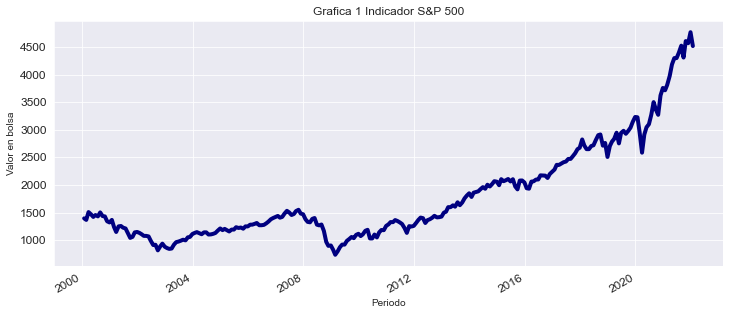

In [ ]:
SyP.Cierre.plot()
ax = SyP.Cierre.plot(figsize=(12, 5), fontsize=12, linewidth=4, color="navy")
ax.set_xlabel("Periodo")
ax.set_ylabel("Valor en bolsa")
ax.set_title("Grafica 1 Indicador S&P 500")
plt.show()

En la **Grafica 1.1** podemos visualizar de mejor manera los valores exacto en los cuales la tendencia de los datos toman **observaciones atípicas**, puntualmente sucede primero en el ultima día de Febrero de 2009, en donde como mencionamos antes, en este punto fue cuando los accionistas volvieron a confiar en el mercado financiero, después de la gran crisis bursátil del 2008, es decir que para que las 500 mejores compañías que cotizan en la bolsa estadounidense pudieran crecer en cuanto a su capitalización o valor en bolsa, debió pasar medio año, en cambio en el otro punto marcado, que corresponde a la especulación ocasionada por la crisis del COVID-19, que es el más valor más bajo de este periodo de crisis que sucedió el 31 de marzo de 2020 con una capitalización de $2584.5901$, tuvieron que pasar poco más de dos meses para que la tendencia volviera a seguir su curso creciente normal.

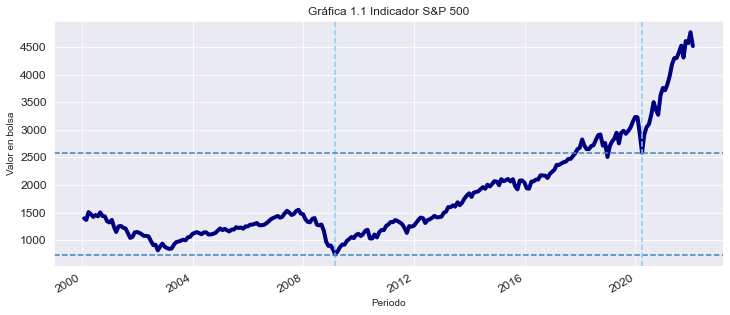

In [ ]:
ax = SyP.Cierre.plot(figsize=(12, 5), fontsize=12, linewidth=4, color="navy")
ax.set_xlabel('Periodo')
ax.set_ylabel('Valor en bolsa')
ax.set_title('Gráfica 1.1 Indicador S&P 500')
ax.axvline('28/02/2009', color='lightskyblue', linestyle='--')
ax.axhline(735.090027, color='steelblue', linestyle='--')
ax.axvline('31/03/2020', color='lightskyblue', linestyle='--')
ax.axhline(2584.5901, color='steelblue', linestyle='--')
plt.show()

### Descomposición Clásica.

La descomposición clásica consta de 4 graficas, la **Gráfica 1** que a analizamos y tres mas que tienen un análisis relevante para el entendimiento de la serie, las cuales son: la **Gráfica 1.2**, la **Gráfica 1.3** y la **Gráfica 1.4**, las cuales podemos clasificar como:

#### Tendencia

La cual es la **Grafica 1.2** esta representa lo que ya hemos visto hasta ahora, la tendencia, por lo que podemos reafirmar la tendencia creciente que tiene la serie.

#### Estacionalidad

La gráfica que representa la estacionalidad de la serie bajo el análisis de descomposición clásica es la **Gráfica 1.3**, en esta podemos ver que durante un comportamiento estacional el cual es el mismo para cada uno de esos periodos, por lo que decimos que la serie es **estacional**

#### Residuos

Por último tenemos el comportamiento residual de la variable, que se ve en la **Gráfica 1.4**, en donde podemos ver que el comportamiento de estos tiende a la media durante prácticamente toda la serie, pero es justamente al final, cuando los residuos se comportan de manera más dispersa.

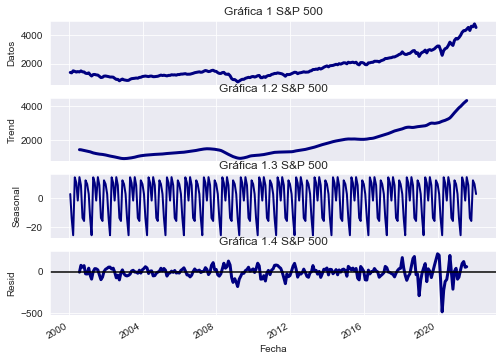

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['Cierre'], period=12)

fig, axes =plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, linewidth=3, color='navy')
axes[0].set_ylabel('Datos')
axes[0].set_title('Gráfica 1 S&P 500')
decomposition.trend.plot(ax=axes[1], legend=False, linewidth=3, color='navy')
axes[1].set_ylabel('Trend')
axes[1].set_title('Gráfica 1.2 S&P 500')
decomposition.seasonal.plot(ax=axes[2], legend=False, linewidth=2, color='navy')
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Gráfica 1.3 S&P 500')
decomposition.resid.plot(ax=axes[3], legend=False, linewidth=3, color='navy')
axes[3].set_ylabel('Resid')
axes[3].axhline(0, color='black', linestyle='-')
axes[3].set_title('Gráfica 1.4 S&P 500')
plt.show()

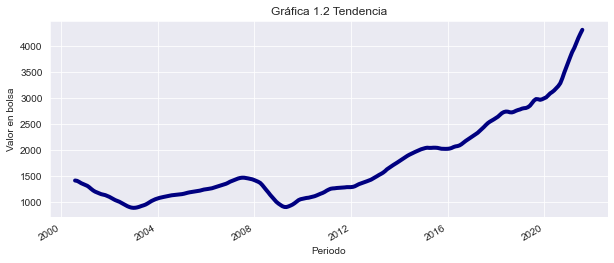

In [ ]:
decomp_seasonal = decomposition.trend
ax = decomp_seasonal.plot(figsize=(10, 4), linewidth=4, color="navy")
ax.set_xlabel('Periodo')
ax.set_ylabel("Valor en bolsa")
ax.set_title('Gráfica 1.2 Tendencia')
plt.show()

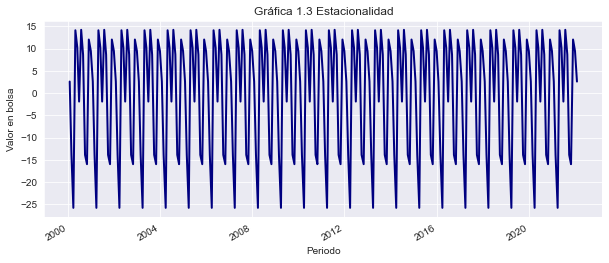

In [ ]:
decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(10, 4), linewidth=2, color="navy")
ax.set_xlabel('Periodo')
ax.set_ylabel("Valor en bolsa")
ax.set_title('Gráfica 1.3 Estacionalidad')
plt.show()

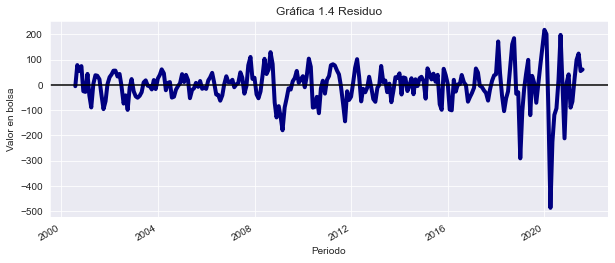

In [ ]:
decomp_seasonal = decomposition.resid
ax = decomp_seasonal.plot(figsize=(10, 4), linewidth=4, color="navy")
ax.set_xlabel('Periodo')
ax.set_ylabel("Valor en bolsa")
ax.set_title('Gráfica 1.4 Residuo')
ax.axhline(0, color='black', linestyle='-')
plt.show()

## 3. Si es necesario, utilizar transformación Box-Cox / logaritmos para estabilizar la varianza.

### ¿Es necesario hacer una transformación "*COX-BOX*"?

Para saber si es necesario que nuestra serie sufra una transformación Cox-Box, primero debemos saber si la distribución de los datos de la serie es normales, es decir que la mayoría de los datos se encuentren en y cerca de la media o gráficamente hablando, que los datos de la formen una campana.
Para saber esto, debemos realizar un histograma, como es que se ve en la **Grafica 2**.

Text(0.5, 1.0, 'Gráfica 2 Histograma')

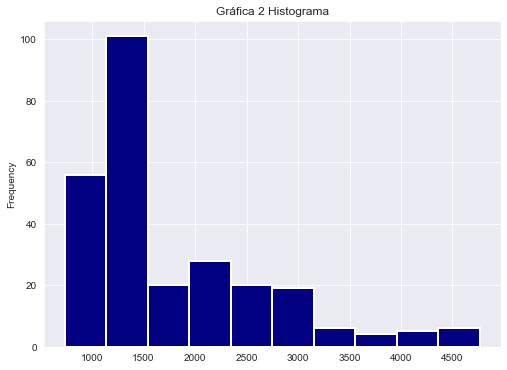

In [ ]:
plt.subplot(1, 2, 1)
ax = SyP.Cierre.plot( kind='hist', figsize=(18, 6), linewidth=2, color="navy")
ax.set_title('Gráfica 2 Histograma')

El histograma (***Gráfica 2***) refleja según intervalos, como se distribuyen los datos de nuestra serie, en el cual podemos ver que no tiene una distribución normal, (es decir, no tiene una forma de campana la distribución) debido a que la mayoría de los datos se distribuyen en la parte más baja de los valores. Lo anterior es más fácil de ver en la ***Gráfica 2.1*** ya que demuestra la densidad del histograma, la cual la mayoría de los datos se encuentran lejos de la media de la serie.

Text(0.5, 1.0, 'Gráfica 2.1 Histograma densidad')

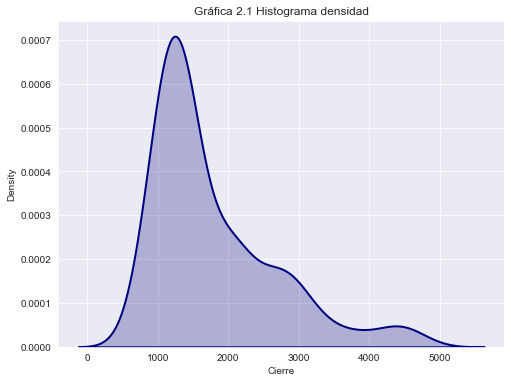

In [ ]:
import numpy as np
from scipy import stats
fitted_SyP, fitted_lambda = stats.boxcox(SyP['Cierre'])
fig, ax = plt.subplots(1, 1)
sns.distplot(SyP['Cierre'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="navy")
ax.set_title('Gráfica 2.1 Histograma densidad')

Como ya vimos que nuestros datos no siguen una transformación normal, entonces utilizamos la transformación Cox-Box para tratar de normalizarlos. Después de la transformación, los datos se comportan como vemos en la ***Gráfica 3*** la distribución los datos ya se encuentran más cerca de la media, es decir, se normalizaron, aunque la distribución no sea estrictamente normal, es un escenario mejor al que teníamos con la serie normal.

Lambda value used for Transformation: -0.7733977989762219


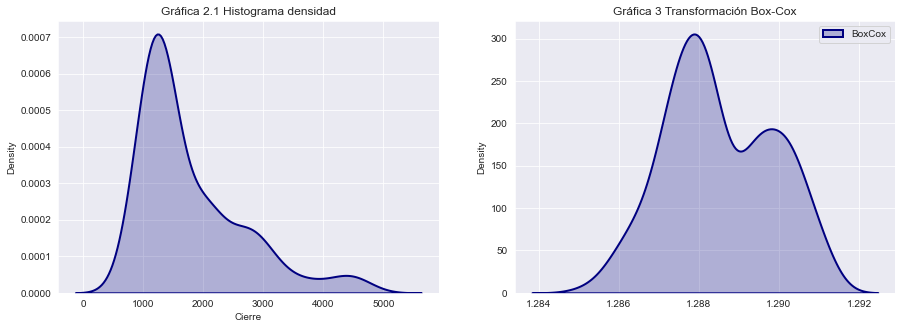

In [ ]:
import numpy as np
from scipy import stats
fitted_SyP, fitted_lambda = stats.boxcox(SyP['Cierre'])
fig, ax = plt.subplots(1, 2)
sns.distplot(SyP['Cierre'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="navy", ax = ax[0])
ax[0].set_title('Gráfica 2.1 Histograma densidad')
sns.distplot(fitted_SyP, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "BoxCox", color ="navy", ax = ax[1])
ax[1].set_title('Gráfica 3 Transformación Box-Cox')
plt.legend(loc = "upper right")
fig.set_figheight(5)
fig.set_figwidth(15)
print(f"Lambda value used for Transformation: {fitted_lambda}")

## Transformación logaritmica.

Para saber si es necesario una transformación logarítmica de nuestros datos, debemos regresar a nuestra primera gráfica (***Gráfica 1***) donde podemos ver que la varianza de nuestros datos no es ni siquiera cercana a la de un *ruido blanco* por lo que hacer una transformación logarítmica nos ayudaría estadísticamente, ya que las condiciones de ruido blanco son las idóneas para una serie de tiempo.

In [ ]:
tspl= np.log(SyP['Cierre'])

In [ ]:
tspd= np.log(SyP['Cierre']).diff()

A continuación tenemos 3 graficas: ***Grafica 1***, ***Gráfica 4.1*** y ***Gráfica 4.2***. En la primera tenemos la gráfica normal de nuestros datos con una varianza alta, en la segunda tenemos el logaritmo de nuestros datos, en esta gráfica la varianza es menor y por último tenemos la gráfica que muestra una diferencia, en esta última podemos ver que tiene una forma más cercana a la de un ruido blanco.

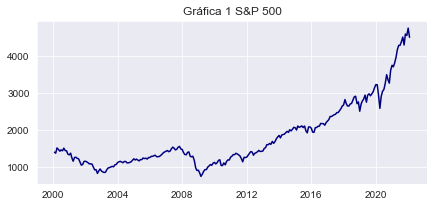

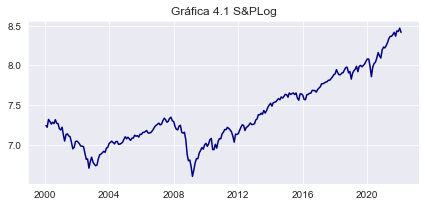

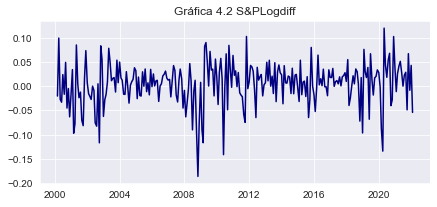

In [ ]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(SyP['Cierre'], color= "navy")
ax.set_title('Gráfica 1 S&P 500')
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspl, color= "navy")
ax.set_title('Gráfica 4.1 S&PLog')
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspd, color= "navy")
ax.set_title('Gráfica 4.2 S&PLogdiff')
plt.show()

## 4. En caso de estacionalidad, aplicar diferencias estacionales.

### ¿La serie es estacional?

### Gráficamente

Para saber si nuestra serie es estacional, debemos de regresar a la ***Gráfica 1*** ya que en esta visualmente podemos si cuenta patrones estacionales, por ejemplo, la venta des esferas de navidad tiene un periodo muy específico en el que suben y después de este las ventas caen, por lo que al graficar unos datos así, podríamos ver como estos datos tienen el mismo patrón (tal vez con diferente tendencia) anualmente. En el caso de nuestra serie, que es un activo financiero, el cual se estimula según el contexto mundial en todos sus ámbitos (no solo económico) la estacionalidad no es algo en lo que suela recurrir estas series, esto lo podemos ver en la ***Gráfica 1***, ya que si solo visualizamos un año con el que sigue tenemos diferentes comportamientos, es más, hay pares de años que se comportan totalmente a la inversa, esto debido a que cosas como la pandemia de 2020 o la invasión Rusa, estimulan de manera repentina al mercado de valores.

### A través de una regresión lineal.


La regresión que necesitamos hacer para saber si nuestra serie lineal, es con variables dummy, las cuales, por medio del *valor p* o *p-value* nos va a decir que tan significantes son para el modelo estas variables y si estas son $<0.05$, entonces nos encontramos en un caso de estacionalidad.

In [ ]:
SyPDUMMY = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/S&P_500_V.dummy.csv")
SyPDUMMY.head()

,Fecha,Cierre,t,t^2,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,31/01/2000,1394.46,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,28/02/2000,1366.42,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,29/03/2000,1508.52,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,30/04/2000,1468.25,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,31/05/2000,1420.60,5,25,0,0,0,0,1,0,0,0,0,0,0,0


Como podemos ver en la regresión siguiente, el valor p para nuestras variables dummy en vada una es $> 0.05$ lo que rechaza la hipótesis nula, lo que quiere decir que **NO hay presencia de estacionalidad**.

In [ ]:
modE = smf.ols("Cierre ~ t + m2 + m3 + m4 + m5 + m6 + m8 + m9 + m10 + m11 + m12", data = SyPDUMMY).fit()
print(modE.summary())

                            OLS Regression Results                            
Dep. Variable:                 Cierre   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     51.29
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           4.48e-58
Time:                        16:27:50   Log-Likelihood:                -2016.2
No. Observations:                 265   AIC:                             4056.
Df Residuals:                     253   BIC:                             4099.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    549.1952     91.510      6.001      0.0

## 5. Usar prueba Dickey-Fuller para evaluar el orden de integración de la serie. Diferenciar hasta que sea estacionaria.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf

Para entender este punto, debemos regresar al punto 3, donde se graficaron las ***Gráficas 1, 4.1 y 4.2*** es decir en las transformaciones logarítmicas, ahí podemos ver la comparación de nuestros datos reales y de las transformaciones de estos datos, (logarítmica y diferencias).

Siguiendo con la prueba *Dickey-Fuller*, esta nos desirve para saber si nuestra serie es estacionaria, es decir, que tiene una media y varianza constante y a su vez no tiene una tendencia definida (Ruido Blanco).

### Dickey-Fuller para la serie normal.

Al hacer la prueba con estos datos nos arroja un valor p de $1.000000$, por lo que rechazamos la hipótesis nula que en la prueba Dickey-fuller significa que la serie NO es estacionaria.

In [ ]:
result = adfuller(SyP)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.059985
p-value: 1.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


### Dickey-Fuller para la serie con logaritmos

Al hacer la prueba con estos datos nos arroja un valor p de $0.992575$, por lo que rechazamos la hipótesis nula que en la prueba Dickey-fuller significa que la serie NO es estacionaria.

In [ ]:
result = adfuller(tspl)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.862085
p-value: 0.992575
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


In [ ]:
tspd[1:]

Fecha
2000-02-28   -0.020313
2000-03-29    0.098935
2000-04-30   -0.027058
2000-05-31   -0.032992
2000-06-28    0.023803
                ...   
2021-09-30   -0.048738
2021-10-29    0.066858
2021-11-30   -0.008369
2021-12-31    0.042689
2022-01-31   -0.054018
Name: Cierre, Length: 264, dtype: float64

### Dickey-Fuller para la serie con una diferencia.

Al hacer la prueba con estos datos nos arroja un valor p de $\leq 0.000000$, por lo que no se rechaza la hipótesis nula, lo que significa que en este caso, la serie si es estacionaria.

In [ ]:
result = adfuller(tspd[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.086745
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


## 6. Mediante herramientas ACF y PACF construir propuestas de modelos de la serie elegida.

A través de las herramientas **ACF** y **PACF** vamos a sacar el orden de medias móviles y autorregresivo para nuestro modelo arrima, empezando primero con...

### ACF

Con el proceso de medias moviles en nuestro modelo "*tspd*", osease, nuestra base logaritmica, nos indica un orden $MA=1$  

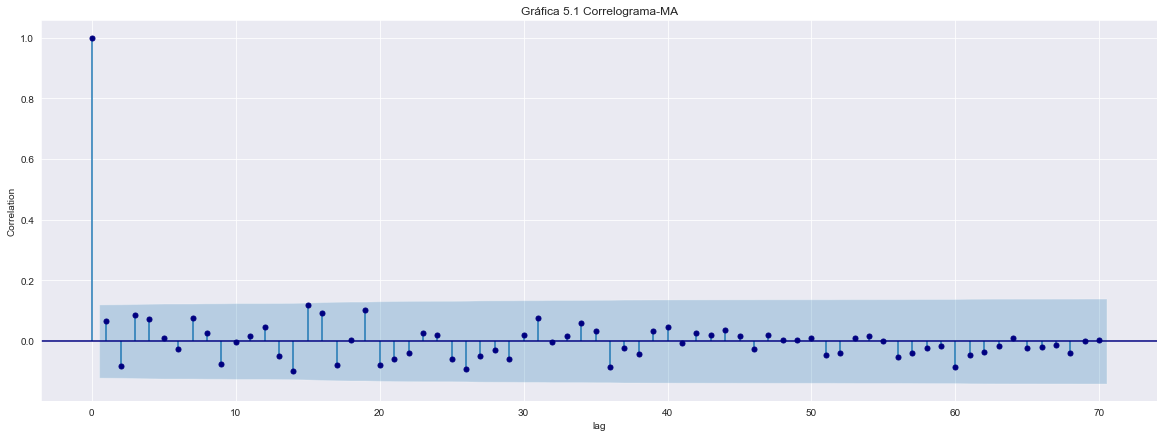

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt##
ax = plt.rcParams["figure.figsize"] = (20,7)
acf_plot = plot_acf(tspd.dropna(), lags = 70, color= 'navy')
plt.title("Gráfica 5.1 Correlograma-MA")
plt.xlabel('lag')
plt.ylabel('Correlation')
plt.show()

### PACF

Al igual que en *ACF* El orden para $AR=1$, el cual lo sacamos con este proceso autorregresivo.

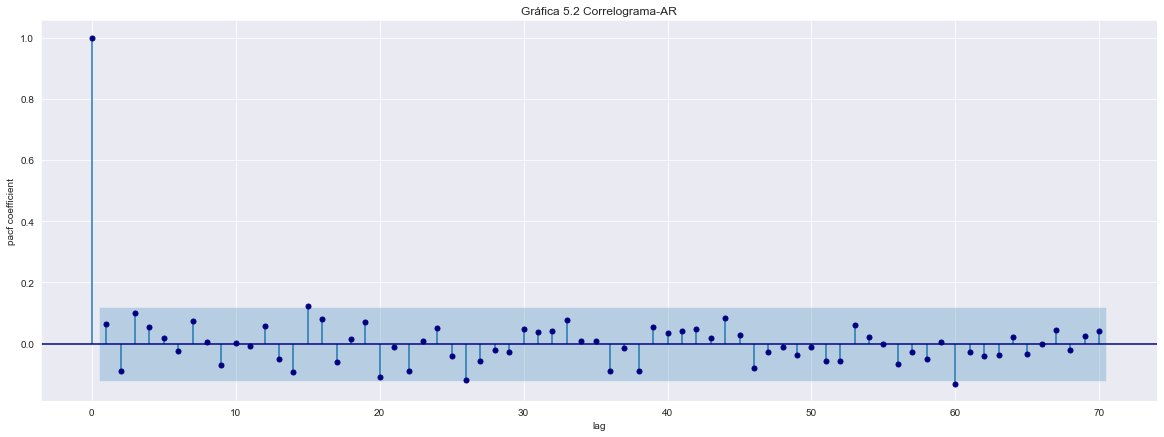

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)
acf_plot = plot_pacf(tspd.dropna(), lags = 70, color= "navy")
plt.title("Gráfica 5.2 Correlograma-AR")
plt.xlabel('lag')
plt.ylabel('pacf coefficient')
plt.show()

En conclusión con las herramientas *ACF* y *PACF*, tenemos el orden de media móvil y autorregresivo para la regresión de 1 para ambos.

## 7. Estimar ARMA (Series estacionarias), ARIMA (Series no estacionarias), sARIMA (estacionalidad); analizar los residuos y aplicar prueba Ljung-Box.

Hasta este punto, ya sabemos que nuestra serie no tiene estacionalidad, (Por la regresión con dummy's) en el apartado 4, además de que tampoco es estacionaria, (Prueba Dickey-Fuller) en el apartado 5 tomando no tomando en cuenta las transformaciones.

Esto quiere decir que necesitamos estimar un modelo ARIMA.

## Modelo ARMA.

Para plantear este modelo debemos recordar el número de rezagos que sacamos en el punto anterior, además de recordar de estamos trabajando con los valores tspd, el cual cuenta con una diferenciación, lo que la hace estacionaria por lo que el modelo quedaría especificado como: $(p,d,q) = (1, 0, 1)$, recordando que $d$ es el orden de integración y como estas realizando el modelo *Arma*, la cual se realiza con nuestra serie estacionarios, ponemos en esta parte $0$

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA = ARIMA(tspd.dropna(), order = (1, 0, 1))
res = ARMA.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Cierre   No. Observations:                  264
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 451.881
Date:                Fri, 29 Apr 2022   AIC                           -895.762
Time:                        16:28:34   BIC                           -881.459
Sample:                             0   HQIC                          -890.015
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.003      1.365      0.172      -0.002       0.011
ar.L1         -0.5986      0.268     -2.234      0.025      -1.124      -0.074
ma.L1          0.6997      0.253      2.769      0.006       0.204       1.195
sigma2         0.0019      0.000     14.381      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                43.32
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.63
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En el modelo **ARMA** podemos ver a través del *valor p* que muestra que el termino en *AR* **si es significativo** al modelo, es decir su valor p es $0.025 < 0.05$ por lo que rechazamos la hipótesis nula, lo que significa que el termino si es significativo. En cuanto a el término en *MA* también **es significativo** al modelo, ya que su valor p es $0.006 < 0.05$ por lo que se rechaza la hipótesis nula, lo que significa que el termino si es significativa y por lo mismo no es necesario tener que volver a hacer otro modelo ARMA, eliminando términos no significativos.

### Estadísticos de chi-cuadrada de Ljung-Box

Para saber si los residuos están correlacionados con el modelo, debemos analizar la prueba *Ljung-Box* en este podemos ver qué el valor p es $> 0.05$, en este caso la hipótesis nula nos dice que los residuos *SI* son independientes, como nuestro valor es $0.732364 > 0.05$, no se rechaza la hipótesis nula, lo que quiere decir que **los residuos son independiente**, lo cual no sugestiona nuestro análisis, ya que cumple con los supuestos del modelo.

Por ultimo también es preciso recalcar que el valor p de la constante del modelo (intercepto), no es significativa al modelo, ya que esta es mayor a $0.05$.

In [ ]:
sm.stats.acorr_ljungbox(res.resid, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.116952,0.732364


En el siguiente conjunto de gráficas podemos ver el análisis de nuestra **Gráfica 4.2** (con los datos estacionarios) donde primero tenemos nuestra **Gráfica 4.2** con una media y varianza constante además de no tener una tendencia definida, la segunda grafica que se ve es la distribución de los datos, a través de un **Histograma**, la cual se encuentra más normalizada, que cuando se realizó la transformación *Cox-Box* ya que esta se hizo con los datos normales de la serie. La tercera gráfica es un **Gráfico Q-Q**, en este podemos ver de mejor manera si los datos están normalizados al 100%, ya que si la distribución de los datos se encuentra dentro de la línea roja, decimos que estrictamente los datos están normalizados, esto resulta muy difícil de conseguir en la realidad, ya que son variables estocásticas. En el caso de nuestras gráficas, encontramos que en las colas los datos se separan más a comparación del resto, pero en medio tienden al centro (con algunas excepciones en algunas zonas, pero estas no se separan mucho) lo cual nos dice que la distribución esta cercana a la normalidad. Por último tenemos el **correlograma** de nuestra serie estacionaria, en este, a diferencia de los obtenidos en el primer trabajo, podemos ver que los problemas de correlación del modelo se han eliminado, gracias a la diferencia realizada. Todo lo anterior nos demuestra que tenemos un modelo bueno, ya que cumple con alguna de las condiciones/supuestos, para poder realizar un análisis acertado.

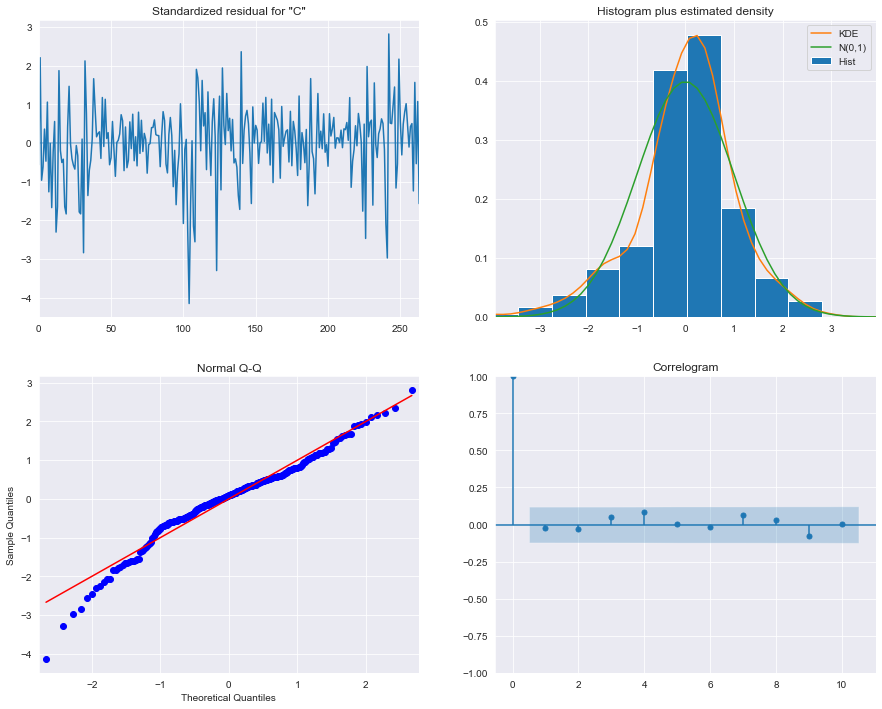

In [ ]:
res.plot_diagnostics(figsize=(15, 12))
plt.show()

## 8. Estimar auto arima y comparar criterios de información para elegir el mejor modelo.

In [ ]:
!pip install pmdarima

En el autoarima podemos ver un orden de *AR* y *MA* iguales a los obtenidos antes, ademas de que cada una de las variables al del modelo, son significantes a este, como de igual manera podemos ver con el modelo **ARMA**. En cuanto a la correlación residual, podemos ver que en ambos modelos no se cuenta con esto. Ya que en el modelo de **Autoarima** el valor p es $0.639359 > 0.05$, lo cual no rechaza la hipótesis nula y se dice que los residuos son independientes.

In [ ]:
from pmdarima import auto_arima
training_data = tspd.dropna()
smodela = auto_arima(training_data, start_p=0, start_q=0,
                       max_p=3, max_q=3, max_d = 2,
                       seasonal=True,m=4,
                       start_P=0, start_Q = 0, max_P = 3, max_Q = 3,
                       max_D = 2,information_criterion='aic',test='adf',
                       trace=True)
smodela.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=-895.750, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=-894.149, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=-894.282, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=-895.065, Time=0.07 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=-895.242, Time=0.21 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=-895.176, Time=0.35 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=-893.859, Time=0.63 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=-894.877, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=-895.139, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=-895.762, Time=0.39 sec
 ARIMA(1,0,1)(1,0,0)[4] intercept   : AIC=-896.070, Time=1.06 sec
 ARIMA(1,0,1)(2,0,0)[4] intercept   : AIC=-894.374, Time=1.72 sec
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=-894.826, Time=0.94 sec
 ARIMA(1,0,1)(0,0,1)[4] intercept   : AIC=-895.896, Time=0.70 sec
 ARIMA(1,0,1)(2,0,1)[4] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  264
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 4)   Log Likelihood                 452.074
Date:                            Fri, 29 Apr 2022   AIC                           -896.149
Time:                                    16:30:30   BIC                           -881.845
Sample:                                         0   HQIC                          -890.401
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7099      0.189     -3.758      0.000      -1.080      -0.340
ma.L1          0.8137      0.163      5.003      0.000       0.495       1.132
ar.S.L4        0.1134      0.053      2.136      0.033       0.009       0.217
sigma2         0.0019      0.000     14.190      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                30.68
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.52
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Volvemos a hacer el modelo para poder sacar la prueba Ljung-Box.
import statsmodels.api as sm
sarima=sm.tsa.statespace.SARIMAX(tspd.dropna(),order=(1, 0, 1), seasonal_order=(1,0,[],4))
sRES=sarima.fit()
sRES.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Cierre   No. Observations:                  264
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 4)   Log Likelihood                 452.074
Date:                            Fri, 29 Apr 2022   AIC                           -896.149
Time:                                    16:30:31   BIC                           -881.845
Sample:                                         0   HQIC                          -890.401
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7099      0.189     -3.758      0.000      -1.080      -0.340
ma.L1          0.8137      0.163      5.003      0.000       0.495       1.132
ar.S.L4        0.1134      0.053      2.136      0.033       0.009       0.217
sigma2         0.0019      0.000     14.190      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                30.68
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.52
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sm.stats.acorr_ljungbox(sRES.resid, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.219582,0.639359


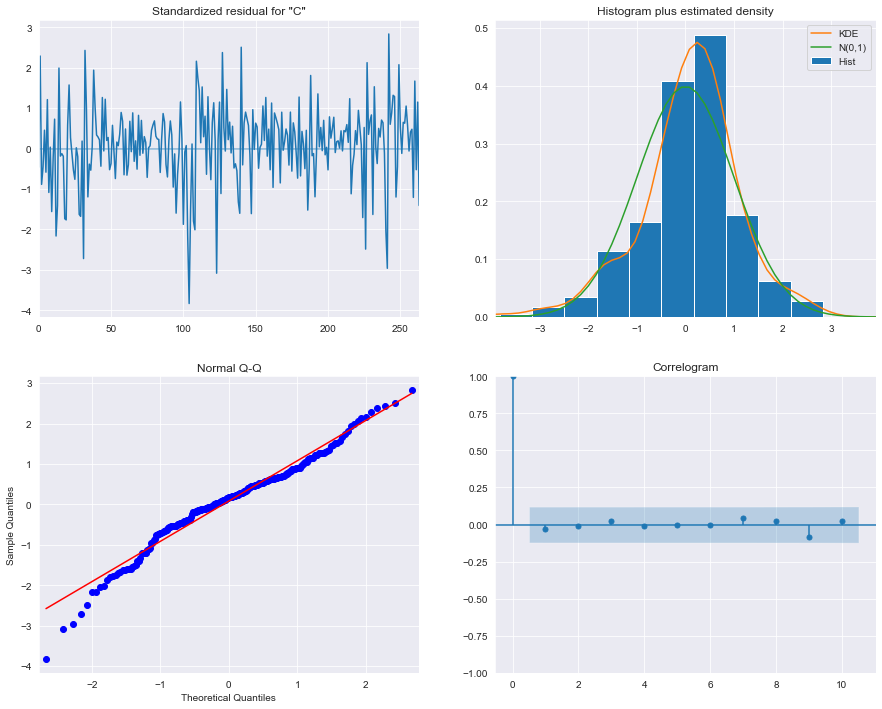

In [ ]:
sRES.plot_diagnostics(figsize=(15, 12))
plt.show()

### ¿Cuál es mejor modelo?

Como analizamos arriba ambos modelos son buenos, es más, se asemejan entre sí, pero suponiendo que a través de la ejecución de un **Autoarima** en python, este nos arroja el mejor modelo posible, además de que nuestra constante en el modelo **ARMA** no es significativa al modelo, por lo que podemos decir que el modelo **SARIMAX** es el mejor para la realización de nuestros pronósticos.

## 9. Presentar ecuación final y describirla.

Nuestra ecuación quedaria como:

$LOG\vartriangle\triangledown_{s}(SyP500)=[\Phi_{1}Y_{t-1}+e_{t}]+[\Psi_{1}e_{t-1}]+[\varepsilon_{t}+e_{t}-e_{t-s}]$

Es decir...

* En la primera parte de nuesta ecuación tenemos el coefieciente de **Ar**, ($\Phi_{1}$) el cual es solo uno.
* Al igual que en **AR**, **MA** solo tiene un coeficiente ($\Psi_{1}$)
* Por ultumo tenemos nuestra diferencia estacional ($\varepsilon_{t}$), que de igual manera solo es un solo coeficiente.

Sustituyendo los coeficientes otenido en nuestro modelo **SARIMAX** tenemo:

$LOG\vartriangle\triangledown_{s}(SyP500)=[-0.7099Y_{t-1}+e_{t}]+[0.8137e_{t-1}]+[0.0019_{t}+e_{t}-e_{t-s}]$

## 10. Crear un pronóstico a tres años.

In [ ]:
print(sRES.forecast(steps=36))

264   -7.931211e-03
265    1.006271e-02
266   -2.977182e-03
267   -5.750626e-04
268   -4.838694e-03
269    3.937514e-03
270   -2.322875e-03
271    1.344189e-03
272   -1.549119e-03
273    1.156694e-03
274   -7.675821e-04
275    5.103470e-04
276   -4.297408e-04
277    3.115326e-04
278   -2.150851e-04
279    1.487707e-04
280   -1.132590e-04
281    8.113496e-05
282   -5.690930e-05
283    3.995567e-05
284   -2.923150e-05
285    2.083447e-05
286   -1.471234e-05
287    1.039393e-05
288   -7.476942e-06
289    5.317295e-06
290   -3.765899e-06
291    2.667701e-06
292   -1.904945e-06
293    1.353388e-06
294   -9.597670e-07
295    6.806912e-07
296   -4.844862e-07
297    3.440578e-07
298   -2.441329e-07
299    1.732365e-07
Name: predicted_mean, dtype: float64


In [ ]:
# Here we construct a more complete results object.
fcast_res = sRES.get_forecast(steps=36)

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res.summary_frame(alpha=0.10))

Cierre          mean   mean_se  mean_ci_lower  mean_ci_upper
264    -7.931211e-03  0.043648      -0.079726       0.063864
265     1.006271e-02  0.043883      -0.062118       0.082244
266    -2.977182e-03  0.044001      -0.075352       0.069397
267    -5.750626e-04  0.044060      -0.073047       0.071897
268    -4.838694e-03  0.044185      -0.077517       0.067840
269     3.937514e-03  0.044217      -0.068792       0.076667
270    -2.322875e-03  0.044232      -0.075079       0.070433
271     1.344189e-03  0.044240      -0.071425       0.074113
272    -1.549119e-03  0.044240      -0.074318       0.071220
273     1.156694e-03  0.044243      -0.071617       0.073930
274    -7.675821e-04  0.044244      -0.073543       0.072008
275     5.103470e-04  0.044245      -0.072266       0.073287
276    -4.297408e-04  0.044245      -0.073207       0.072347
277     3.115326e-04  0.044245      -0.072466       0.073089
278    -2.150851e-04  0.044245      -0.072992       0.072562
279     1.487707e-04  0.

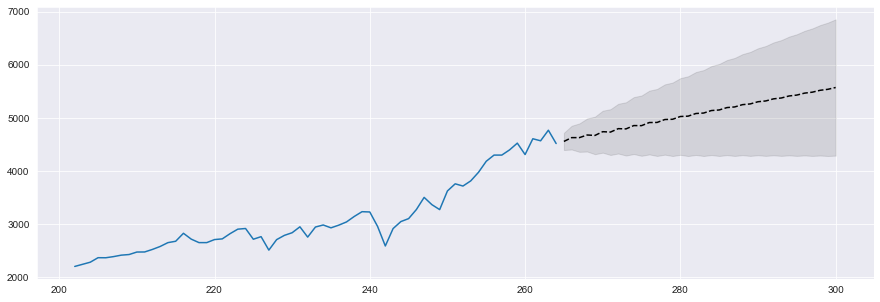

In [ ]:
fig, ax = plt.subplots( figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
SyPDUMMY['Cierre'].loc['2018':].plot(ax=ax)

# Construct the forecasts
fcast = sRES.get_forecast(steps=36).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);